In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [105]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv', nrows=100) 
df.info()
# Define features and target
X = df.drop('billing_amount', axis=1)
y = df['billing_amount']

# Identify categorical and numerical features
categorical_features = ['medical_condition', 'admission_type', 'doctor', 'hospital', 'insurance_provider']
numerical_features = ['age', 'length_of_stay']

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                100 non-null    object 
 1   age                 100 non-null    int64  
 2   gender              100 non-null    object 
 3   blood_type          100 non-null    object 
 4   medical_condition   100 non-null    object 
 5   date_of_admission   100 non-null    object 
 6   doctor              100 non-null    object 
 7   hospital            100 non-null    object 
 8   insurance_provider  100 non-null    object 
 9   billing_amount      100 non-null    float64
 10  room_number         100 non-null    int64  
 11  admission_type      100 non-null    object 
 12  discharge_date      100 non-null    object 
 13  medication          100 non-null    object 
 14  test_results        100 non-null    object 
 15  length_of_stay      100 non-null    int64  
dtypes: float6

In [106]:
# Create a pipeline that first preprocesses the data then fits a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'length_of_stay']),
                                                 ('cat', OneHotEncoder(),
                                                  ['medical_condition',
                                                   'admission_type', 'doctor',
                                                   'hospital',
                                                   'insurance_provider'])])),
                ('regressor', LinearRegression())])

In [107]:
# Define features and target
X = df.drop('billing_amount', axis=1)
y = df['billing_amount']

# Identify categorical and numerical features
categorical_features = ['medical_condition', 'admission_type', 'doctor', 'hospital', 'insurance_provider']
numerical_features = ['age', 'length_of_stay']

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data then fits a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 277784950.70868224
R-squared: -0.28796850793618556


In [109]:
import joblib
# Display a few predictions versus actual values
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head())

# Save the model to a file
joblib.dump(model, 'billing_amount_predictor.pkl')

# Example of making a prediction
loaded_model = joblib.load('billing_amount_predictor.pkl')



     Actual     Predicted
0   3864.13  16043.220156
1  14362.31  20287.460474
2  49833.70  27715.726161
3  25250.05  21553.667303
4  23762.20  36272.527021


In [110]:
example_data = pd.DataFrame({
    'age': [50],
    'length_of_stay': [10],
    'medical_condition': ['Diabetes'],
    'admission_type': ['Emergency'],
    'doctor': ['Kelly Olson'],
    'hospital': ['Group Middleton'],
    'insurance_provider': ['Medicare']
})

# Predict billing amount
predicted_billing_amount = loaded_model.predict(example_data)
print(f'Predicted Billing Amount: {predicted_billing_amount[0]}')

Predicted Billing Amount: 17220.97348080792


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the polynomial feature transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline with polynomial features and linear regression
poly_model = make_pipeline(
    preprocessor,
    poly,
    LinearRegression()
)

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred = poly_model.predict(X_test)

# Evaluate the model
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


MSE: 205284125.24551803
R-squared: 0.04818641967132675


C:\Users\Kruthika reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


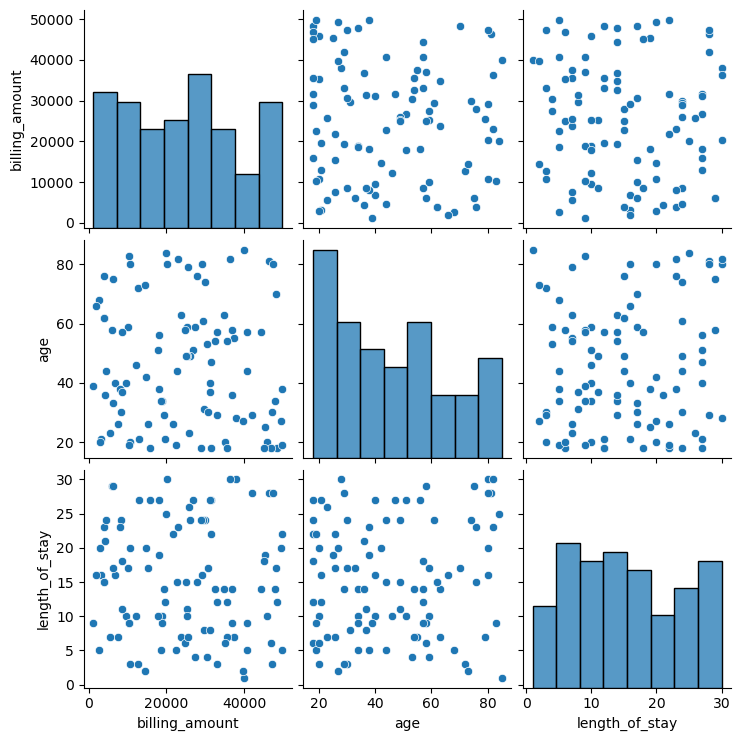

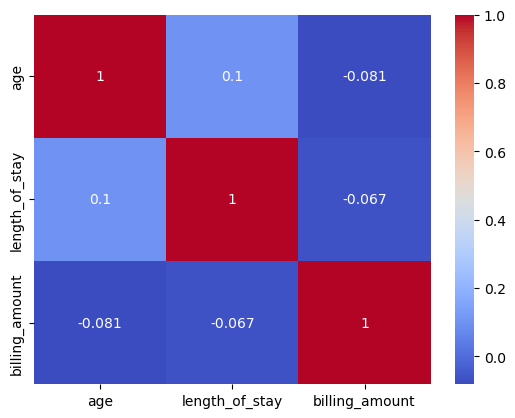

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['billing_amount', 'age', 'length_of_stay', 'medical_condition']])
plt.show()

sns.heatmap(df[['age', 'length_of_stay', 'billing_amount']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [113]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Polynomial Regression R-squared:", r2_score(y_test, y_pred_ridge))


Ridge Polynomial Regression MSE: 206154573.684278
Ridge Polynomial Regression R-squared: 0.044150527251507254
